# Linear Regression model section 3
## Training a Regression model Using Lasso Algorithem 
#### Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression algorithm with L1 regularization. or
#### It’s Linear Regression + a penalty that forces the model to shrink some coefficients to exactly zero.

In [2]:
# importing requred libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split  # preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the training data set
file_path = r"C:\Users\Ravichandran\OneDrive\Desktop\daily-bike-share.csv"
bike_data = pd.read_csv(file_path)
bike_data = bike_data.copy()

In [4]:
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [5]:
bike_data.drop(['yr'], axis=1, inplace=True)

In [6]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [7]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

### making different varibels for numeric values and catogorical values

In [8]:
numeric_futur = ['temp', 'atemp','hum','windspeed']

categorical_future = ['season','mnth','holiday','weekday','workingday','weathersit','day']

In [9]:
bike_data[numeric_futur+['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [10]:
print(bike_data.head())

   instant    dteday  season  mnth  holiday  weekday  workingday  weathersit  \
0        1  1/1/2011       1     1        0        6           0           2   
1        2  1/2/2011       1     1        0        0           0           2   
2        3  1/3/2011       1     1        0        1           1           1   
3        4  1/4/2011       1     1        0        2           1           1   
4        5  1/5/2011       1     1        0        3           1           1   

       temp     atemp       hum  windspeed  rentals  day  
0  0.344167  0.363625  0.805833   0.160446      331    1  
1  0.363478  0.353739  0.696087   0.248539      131    2  
2  0.196364  0.189405  0.437273   0.248309      120    3  
3  0.200000  0.212122  0.590435   0.160296      108    4  
4  0.226957  0.229270  0.436957   0.186900       82    5  


In [11]:
# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


#  Evaluating Model Performance with Plots using Lasso Algorithem

In [12]:
from sklearn.linear_model import Lasso

# Fit a lasso model on traning data
model = Lasso().fit(X_train,y_train)
print(model)

Lasso()


In [13]:
# Evaluate the model using test data
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,np.round(y_test[:10]))




Predicted labels:  [1887. 1182.  967.  -31.  301.  386.  494.  600. 1445.  -16.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


In [14]:
mse = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,predictions)
print('r2:',r2)
print('mse:',mse)
print('rmse:',rmse)

r2: 0.605646863782449
mse: 320.59809300155405
rmse: 17.90525322360882


### Ploting 

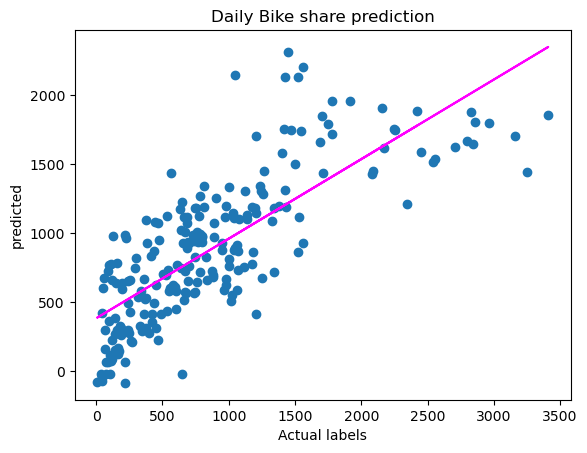

In [15]:
# plot predicted vs actual
plt.scatter(y_test , predictions)
plt.xlabel('Actual labels')
plt.ylabel('predicted')
plt.title('Daily Bike share prediction')


# overlay the regression line
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


In [16]:
# giving inputs to model 
new_trip =  [[1, 	1,	0,	6,	0,	2,	0.344167,	0.363625,	0.805833,	0.160446]]


# Make prediction
predicted_duration = model.predict(new_trip)
print(f"Predicted trip duration: {predicted_duration[0]:.1f} minutes , happy Jorny")

Predicted trip duration: 1052.4 minutes , happy Jorny
